# Intro to Linear Regression and one of their regularizer
## Intuition

**You learn on 1D linear regression from y = mx + b + gaussian_noise to vectorized form of multi-linear regression and use numpy to assist the computation of the normal solution to obtain weights for each of the x_i and the bias term (b_0) through ones stacking by noticing that b_0 applies to all x_i. You later play around with MNIST dataset and apply ridge regression on flattened MNIST dataset to make your digit predictions**

## Technical Walkthrough
### 1. Linear Regression: bias term modeling through normal solution


### 2. MNST data

### 3. Train and Test Split


### 4. Ridge Regression on MNST data




## Pacakges

1. To define your data points, add noises, and perform matrix operations
- [np.arange](https://numpy.org/doc/2.1/reference/generated/numpy.arange.html)
- [np.random.normal](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html)
- [np.matmul](https://numpy.org/doc/2.1/reference/generated/numpy.matmul.html) (can also be used as @)
- [np.linalg.inv](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.inv.html) or [np.linalg.solve](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html)

2. To perform vector definition and vector stacking
- [np.ones](https://numpy.org/doc/2.2/reference/generated/numpy.ones.html)
- [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)


3. To pry into matrix / vector shape for matrix operation
- [np.shape](https://numpy.org/doc/2.1/reference/generated/numpy.shape.html)

4. To flatten your array, stack your ones, and define identity matrix and perform matrix operations
- [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)
- [np.ones](https://numpy.org/doc/2.2/reference/generated/numpy.ones.html)
- [np.eye](https://numpy.org/devdocs/reference/generated/numpy.eye.html)
- [np.matmul](https://numpy.org/doc/2.1/reference/generated/numpy.matmul.html) (can also be used as @)
- [np.linalg.inv](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.inv.html) or [np.linalg.solve](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import torchvision as tv

I'll provide a different structure with more mathematical details for the normal solution to linear regression.

## Linear Regression's Normal Solution

### 1D Linear Regression
$$ y = mx + b + v$$
- v: gaussian noise

### Multi-dimensional Linear Regression
$$y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + \beta_0 $$

### Matrix Form
$$ X = \begin{bmatrix}
1 & x_1  \\
1 & x_2 \\
1 & x_3
\end{bmatrix}$$

$$\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \end{bmatrix}$$

$$y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$

### Normal Equation
$$\hat{\beta} = (X^{\top}X)^{-1}X^{\top}y$$

This minimizes the sum of squared residuals:
$$\min_{\beta} (y - X\beta)^{\top}(y - X\beta)$$

The optimal $\hat{\beta}$ gives us both the slope coefficients and the intercept in one solution.


### Key Insights
- This is the closed-form solution for finding the optimal parameters w^\hat{w} w^ that minimize the sum of squared errors

### Reference
- https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf
- https://grimoire.uw-i2.org/units/Machine%20Learning.pdf

Original X_list.shape: (100,)
Dimnesion expanded X_list.shape: (100, 1)
Your calculated beta (1.014) was not close enough to the expected beta (1)


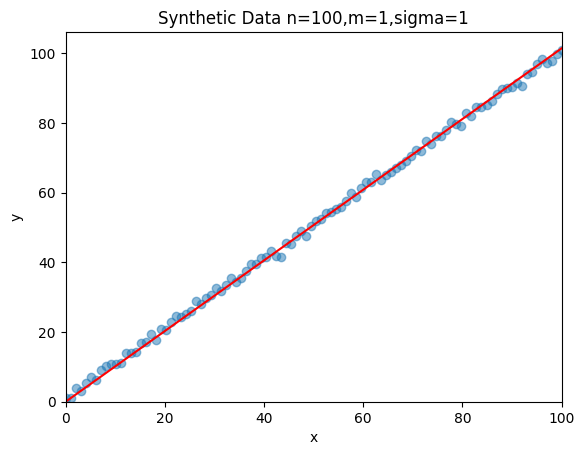

In [39]:
# Regression Initialization
n = 100
m = 1
sigma = 1
mu = 1
v = np.random.normal(loc = mu, scale=sigma, size=100) # note: loc (mean center) = mu, scale (spreadth/width) = sigma
X_list = np.linspace(0, n, 100)
y_list = m*X_list + v


# Matrix need to be at least (n, m) in order to have operation performed
print(f'Original X_list.shape: {X_list.shape}')
X = np.expand_dims(X_list, axis=1)
y = np.expand_dims(y_list, axis=1)
print(f'Dimnesion expanded X_list.shape: {X.shape}')

# Ordinary Least Sqaure solver
def solve_ols(X, y):
  w = np.linalg.inv(X.T@X)@X.T@y
  return w

beta = solve_ols(X, y)

import math
try:
  assert math.isclose(beta.item(), m, abs_tol=0.01)
  print(f"Your calculated beta ({beta.item():.3f}) was close enough to the expected beta ({m})")
except:
  print(f"Your calculated beta ({beta.item():.3f}) was not close enough to the expected beta ({m})") # expected due to the noises

#y = beta*x + v
plt.scatter(X, y, alpha=0.5)
plt.axline((0, 0), slope=beta.item(), color='red')
plt.title(f"Synthetic Data n={len(X)},m={1},sigma={1}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()




# Modeling with Bias Terms Using a Column of Ones

## Simple Linear Model (No Bias)
$$X = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}\;
y = \begin{bmatrix}
2 \\
4 \\
6 \\
\end{bmatrix}\;
\hat{w} = \begin{bmatrix}
m
\end{bmatrix}
$$

When solving $X\hat{w} = y$:
$$X\hat{w} = \begin{bmatrix}
m \\
2m \\
3m \\
\end{bmatrix} = \begin{bmatrix}
2 \\
4 \\
6 \\
\end{bmatrix} = y$$

This is satisfied when $m=2$, confirming our model $y = X\hat{w}$.

## Adding a Bias Term
To model $y = Xw + b$, we augment $X$ with a column of ones:

$$X = \begin{bmatrix}
1 & 1\\
2 & 1\\
3 & 1\\
\end{bmatrix}\;
y = \begin{bmatrix}
5 \\
7 \\
9 \\
\end{bmatrix}\;
\hat{w} = \begin{bmatrix}
m \\
b
\end{bmatrix}
$$

Solving $X\hat{w} = y$:
$$X\hat{w} = \begin{bmatrix}
m + b\\
2m + b\\
3m + b\\
\end{bmatrix} = \begin{bmatrix}
5 \\
7 \\
9 \\
\end{bmatrix} = y$$

The solution $m=2$ and $b=3$ confirms our model.

## Key Insight
Adding a column of ones to the design matrix $X$ allows us to simultaneously solve for both the slope $m$ and intercept $b$ using standard linear algebra methods




In [40]:

X = np.expand_dims(X_list, axis=1) # (n,) -> (n, 1)
y = np.expand_dims(y_list, axis=1) # (n,) ->(n, 1)

ones = np.ones((X.shape[0], 1)) # (n, 1) of ones
X = np.hstack((X, ones))


w = solve_ols(X, y)

slope = w[0].item()
intercept = w[1].item()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")



Slope: 0.996720277437595
Intercept: 1.186082892842649


Verify the Model

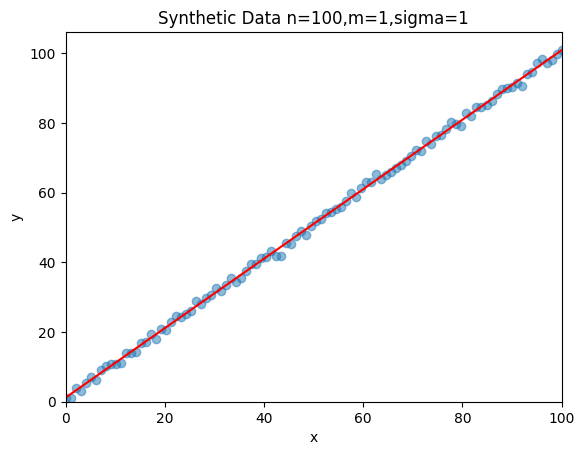

In [41]:
plt.scatter(X[:,0], y, alpha=0.5)
plt.axline((0, intercept), slope=slope, color='red')
plt.title(f"Synthetic Data n={n},m={m},sigma={sigma}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## MNIST Dataset
 [MNIST](https://en.wikipedia.org/wiki/MNIST_database).
 - The hello world dataset in machine learning.
 - It consists of 70k of  $28 \times 28$ grey-scale images of digits (0-9)
    - Implies: your num_images x i x j are your `input x` ($(i,j)$ forms one pixel), and your `input y ` are the digits 0-9


In [42]:
all_data = tv.datasets.MNIST('./data', download=True)

data = all_data.data.numpy()
labels = all_data.targets.numpy()
print(f"Data Shape:{data.shape}") # = (60000, 28, 28)
print(f"Label Shape: {labels.shape}") # = (60000,)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 465kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.26MB/s]


Data Shape:(60000, 28, 28)
Label Shape: (60000,)


# Test-Train Split Methods

## Using scikit-learn
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

## Manual Split with Python
```python
split_point = int(0.8 * len(X))
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]
```


In [43]:

n_train = 10000
n_test = 500

train_data = data[:n_train]
train_labels = labels[:n_train]

test_data = data[:n_test]
test_labels = labels[:n_test]
print(f"Train Data Shape:{train_data.shape}") # = (n_train, 28, 28)
print(f"Train Label Shape: {train_labels.shape}") # = (n_train,)

print(f"Test Data Shape:{test_data.shape}") # = (n_test, 28, 28)
print(f"Test Label Shape: {test_labels.shape}") # = (n_test,)


Train Data Shape:(10000, 28, 28)
Train Label Shape: (10000,)
Test Data Shape:(500, 28, 28)
Test Label Shape: (500,)


Now let's actually look at the data in images.

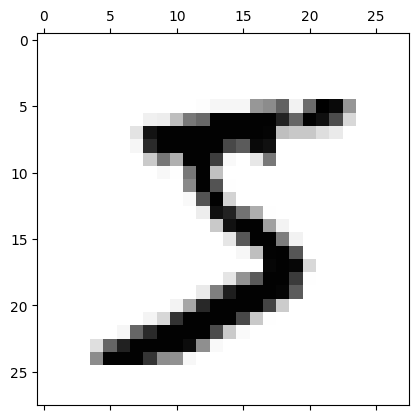

Associated Label: 5
---


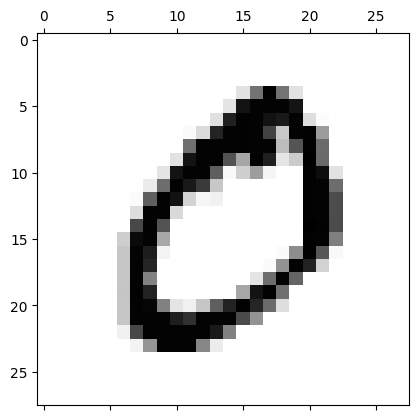

Associated Label: 0
---


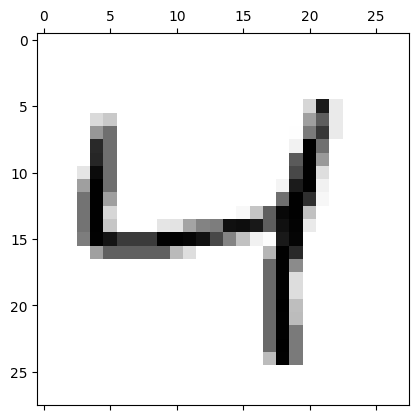

Associated Label: 4
---


In [44]:

num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    X = train_data[i]
    plt.matshow(X.reshape(28, 28), cmap='Greys') # note: there 2d matrix of num_image x 28 x 28
    plt.show()
    print(f"Associated Label: {train_labels[i]}")
    print("---")


## Ridge Regression on MNST data

Ridge regression likes feature vector input (a 28x28 = 784 dimensional vector).


One-hot-encoding is used for the label (higher level concept -> diffuclt to descrhibe) for regression learning purpose

Ridge regression:

$$\hat{w}_{ridge} = \underset{w}{\arg\min} \sum_{i=1}^n (y_i - wx_i)^2 + \lambda||w||_2^2 $$

Solving yields us:

$$\hat{w}_{ridge} = (X^{\top}X + \lambda I)^{-1}X^{\top}y$$




In [45]:
# One-hot encodes the training and testing labels
y = np.zeros((train_labels.shape[0], 10)) # y.shape = (n_train, 10); note: we denote (row, col) / (n, m) where row denotes features and col denotes samples
y[np.arange(train_labels.shape[0]), train_labels] = 1 # y[i,j] = 1

y_test = np.zeros((test_labels.shape[0], 10))
y_test[np.arange(test_labels.shape[0]), test_labels] = 1


# Reformat the data
X = np.reshape(train_data,(-1, 784))
X_test = np.reshape(test_data, (-1, 784))

print(X.shape)
# Add bias term to help with soliving w
X = np.hstack([X, np.ones((X.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


lambda_reg = 0.001


def solve_rr(X, y):
  w = np.linalg.inv(X.T @ X + lambda_reg * np.eye(X.shape[1])) @ X.T @ y # identity matrix shoudl correspond to the col that x has
  return w

beta= solve_rr(X, y)

total = 0
correct = 0
for x, label in zip(X_test, y_test):
  pred = np.argmax(beta.T @ x)
  gt = np.argmax(label)
  if pred == gt:
    correct += 1
  total += 1

import time
t1 = time.time()
print(f"Accuracy on {len(X_test)} test examples: {correct/total}")
print(f"Time taken: {time.time()-t1}")
#----------------------------------------------------------------#

(10000, 784)
Accuracy on 500 test examples: 0.88
Time taken: 0.0005052089691162109
